In [100]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [101]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")

In [107]:
df_train

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum,apk
450,2014,49905,101,6995.0,1,1,11,146
357,2009,141940,67,4250.0,1,1,11,146
380,2009,135660,95,3940.0,1,1,11,146
145,2007,126737,77,3448.0,0,1,6,146
212,2006,167873,78,1995.0,1,1,11,1
...,...,...,...,...,...,...,...,...
700,2012,258709,84,2750.0,1,0,11,146
71,2007,139899,78,3490.0,1,1,3,360
106,2006,144791,78,2999.0,1,1,14,257
270,2011,171874,86,2748.0,1,0,14,274


In [103]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

In [104]:
df_train.drop(['prijs'], axis=1)

,bouwjaar,kilometer_stand,vermogen,is_handgeschakeld,is_benzine,upload_datum,apk
450,2014,49905,101,1,1,11,146
357,2009,141940,67,1,1,11,146
380,2009,135660,95,1,1,11,146
145,2007,126737,77,0,1,6,146
212,2006,167873,78,1,1,11,1
...,...,...,...,...,...,...,...
700,2012,258709,84,1,0,11,146
71,2007,139899,78,1,1,3,360
106,2006,144791,78,1,1,14,257
270,2011,171874,86,1,0,14,274


533/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.0, 135.0)

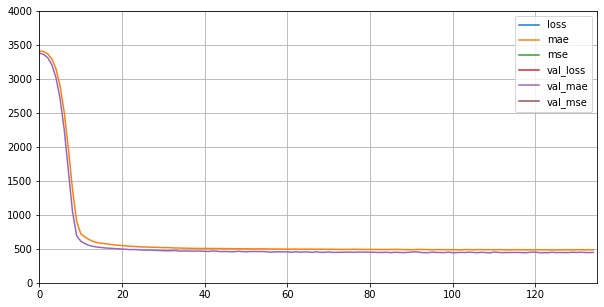

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(6, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
    X_train_tf, 
    y_train_tf.values, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid.values),
    verbose=0,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test.values)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [106]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto/assets


['TFAuto/TFScaler.pkl']

In [ ]:
X_test